In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [5]:
# Read the data
data = pd.read_csv(r"./ext_prod1.csv")

In [6]:
result = data.groupby('depth').mean(numeric_only=True).reset_index()
result

,depth,noise
0,1,1.331000e+03
1,2,7.964000e+03
2,3,4.636800e+04
3,4,4.330180e+05
4,5,3.260456e+06
5,6,2.580169e+07
6,7,1.438229e+08
7,8,1.519971e+09
8,9,1.263981e+10
9,10,1.291328e+11


In [7]:
x = np.arange(1, 10.1, 0.01)
y = 5 * 15**(x+4)

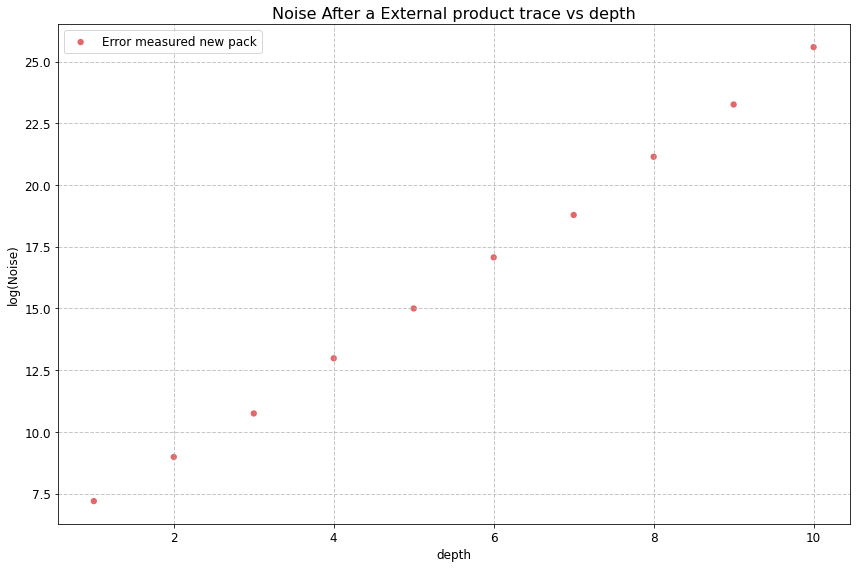

In [8]:
# Create the plot
plt.figure(figsize=(12, 8))
#plt.plot(x, y, color='green', label=f'Error bound:')  
plt.scatter(result['depth'], np.log(result['noise']), s=40, color='tab:red', alpha=0.7, edgecolors='none', label='Error measured new pack')

# Log scale for X-axis assuming it's 2**i
plt.xlabel(r'depth', fontsize=12)
plt.ylabel('log(Noise)', fontsize=12)

# Title
plt.title('Noise After a External product trace vs depth', fontsize=16)

# Grid
plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)

# Tweak layout
plt.tight_layout()
plt.savefig("ext_prod.png", dpi=300)
plt.show()

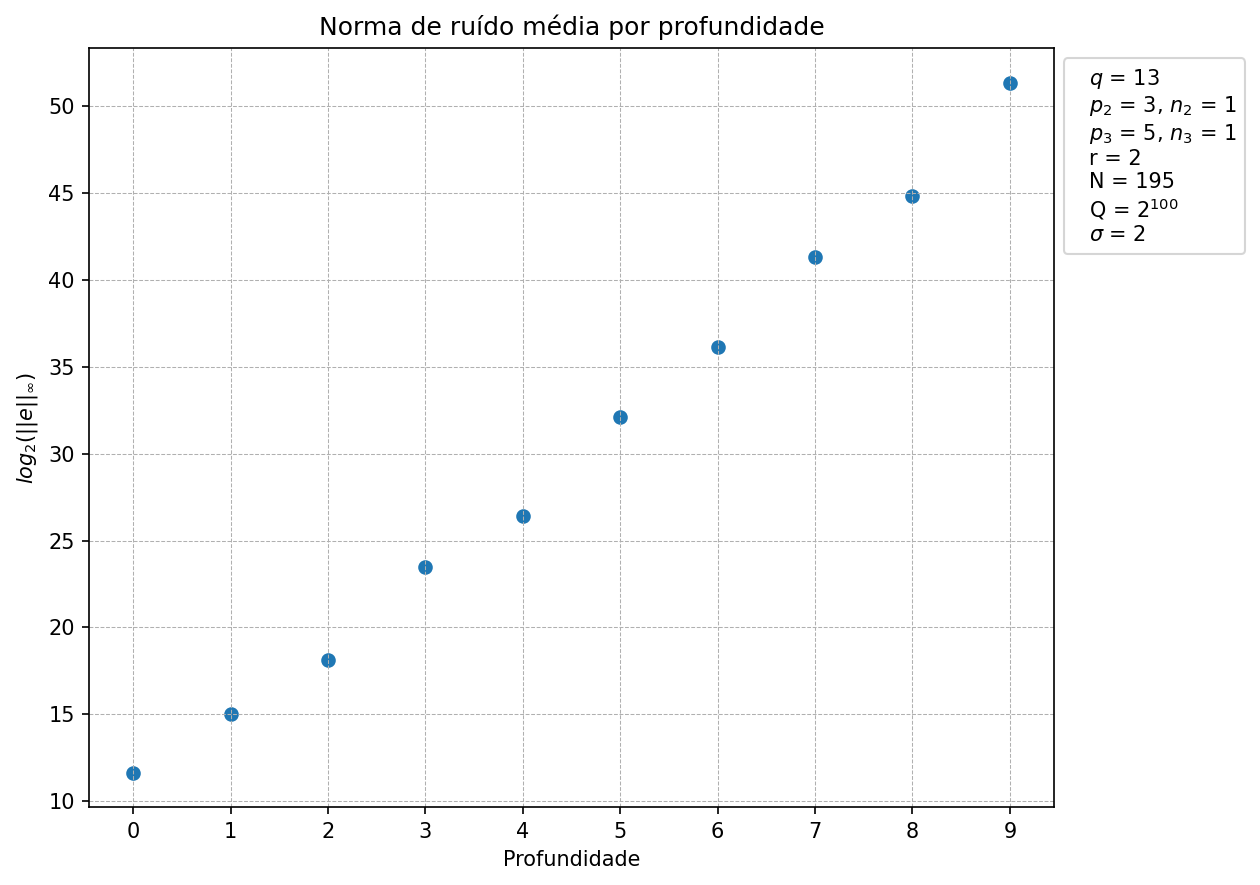

<Figure size 432x288 with 0 Axes>

In [15]:
from matplotlib.patches import Patch

# Data
X = [i for i in range(10)]
Y = np.log2([3231.55000000000,32881.7500000000,289763.500000000,1.17270814500000e7,8.81939217000000e7,4.58729942330000e9,7.37867251176000e10,2.66609578691255e12,3.03692637302942e13,2.83938932978841e15])

# Create a figure with higher resolution
plt.figure(figsize=(10, 6), dpi=150)

# Plotting the data
plt.scatter(X, Y)

# Add a log-spaced grid in the y-axis
plt.grid(which="both", axis="y", linestyle="--", linewidth=0.5)

# Add an even-spaced grid in 1..10 for the x-axis
plt.xticks(np.arange(0, 10, 1))
plt.grid(which="major", axis="x", linestyle="--", linewidth=0.5)

# Add title and labels
plt.title("Norma de ruído média por profundidade")
plt.ylabel("$log_2(||e||_{\infty})$")
plt.xlabel("Profundidade")

# Add a legend with the provided values
p1, n1 = 13, 1
p2, n2 = 3, 1
p3, n3 = 5, 1
n = 195
r = 2
Q = 2**100
sigma = 2

legend_text = (
    f"$q$ = {p1**n1}\n"
    f"$p_2$ = {p2}, $n_2$ = {n2}\n"
    f"$p_3$ = {p3}, $n_3$ = {n3}\n"
    f"r = {r}\n"
    f"N = {n}\n"
    f"Q = $2^{{100}}$\n"
    f"$\\sigma$ = {sigma}"
)

# Create a custom legend handle to remove the dot
legend_handle = [Patch(facecolor='none', edgecolor='none')]

plt.legend(legend_handle, [legend_text], loc='upper left', bbox_to_anchor=(1, 1), handlelength=0)

# Adjust layout to prevent legend from being cut off
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()
plt.savefig("wrong_packing.jpg")